In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
train_data = pd.read_csv("./Assignment3-train.txt", header=None)
train_data.head()
train_data.dropna
y_data = train_data.get(0)
x_data = train_data.drop([0], axis = 1)
y_data= y_data.replace(5, 1)
y_data= y_data.replace(3, -1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
class AdaBoost:

    def __init__(self):
        self.stumps = None
        self.stump_importance = None
        self.errors = None
        self.smplWeights = None

    def _check_X_y(self, X, y):
        assert set(y) == {-1, 1}
        return X, y

In [7]:

def totalGiniImpurity(a, b, c, d):
    total_elements = a + b + c + d
    gini_1 = 1 - np.square(a/(a+b)) - np.square(b/(a+b))
    gini_2 = 1 - np.square(c/(c+d)) - np.square(d/(c+d))
    total_gini = ((a+b)/total_elements) * gini_1 + ((c+d)/total_elements) * gini_2
    return total_gini 
    
def calculateGiniForColumn(x_col, y):
  mAvg = x_col.max() + x_col.min()
  mAvg /=2
  leftGini = 0
  rightGini = 0
  a,b,c,d = 0,0,0,0
  for x_val, y_val in  zip(x_col, y):
    #print(x_val < mAvg)
    if (x_val < mAvg):
      if(int(y_val) == 1):
        a+=1
      else:
        b+=1
    else:
      if(int(y_val) == 1):
        c+=1
      else:
        d+=1
  return totalGiniImpurity(a,b,c,d), a, b, c, d


def descisionStum( X, y):
  miniGini = 3.00000000 
  miniGiniIndex = 0.000000
  ma, mb, mc, md = 0,0,0,0
  for i in range(1, 256):
    #print("udayy")
    calGini, a, b , c, d = calculateGiniForColumn(X[i], y)
    #print("giniiiiiiiiii",calGini)
    if(miniGini > calGini):
      miniGini = calGini
      miniGiniIndex = i
      ma, mb, mc, md = a, b , c, d
  return miniGini, miniGiniIndex

In [8]:
#minG, minGIndex = descisionStum(x_train, y_train)
print("Minimum Gini Index and respective column number:", descisionStum(x_train, y_train) )

Minimum Gini Index and respective column number: (0.31723180247219485, 85)


In [9]:

def fit(self, x: np.ndarray, y: np.ndarray, iterats: int):

    X, y = self._check_X_y(x, y)
    n = X.shape[0]
    self.smplWeights = np.zeros(shape=(iterats, n))
    self.stumps = np.zeros(shape=iterats, dtype=object)
    self.stump_importance = np.zeros(shape=iterats)
    self.errors = np.zeros(shape=iterats)
    self.smplWeights[0] = np.ones(shape=n) / n
    index = []
    for i in range(iterats):
        # fit  weak learner
        currSmplWeights = self.smplWeights[i]
        stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        #print("uda", stump )
        stump = stump.fit(X, y, sample_weight=currSmplWeights)
        #print("uday", stump )
        stump_pred = stump.predict(X)
        #print("udayyyy", stump_pred )
        err = currSmplWeights[(stump_pred != y)].sum()# / n
        stump_importance = np.log((1 - err) / err) / 2
        newSmplWeights = (
            currSmplWeights * np.exp(-stump_importance * y * stump_pred)
        )
        newSmplWeights /= newSmplWeights.sum()
        if i+1 < iterats:
            self.smplWeights[i+1] = newSmplWeights
        self.stumps[i] = stump
        self.stump_importance[i] = stump_importance
        self.errors[i] = err
        index.append(i)
    plt.plot(index,self.errors)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Weighted Error Rate")
    plt.show()

    return self

In [10]:
def predict(self, X):
    stump_preds = np.array([stump.predict(X) for stump in self.stumps])
    return np.sign(np.dot(self.stump_importance, stump_preds))

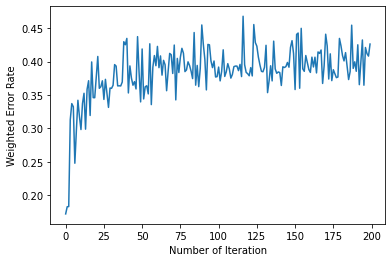

In [12]:
AdaBoost.fit = fit
AdaBoost.predict = predict
classify = AdaBoost().fit(x_train, y_train, iterats=200)

#plot_adaboost(x_train, y_train, clf)



In [13]:
train_err = (classify.predict(x_test) != y_test).mean()
print(f'Train error: {train_err:.1%}')

Train error: 1.6%


In [14]:
test_data = pd.read_csv("./Assignment3-test.txt", header=None)
test_data.head()
test_data.dropna

<bound method DataFrame.dropna of      0    1      2      3      4      5      6      7      8      9    ...  \
0   -1.0 -1.0 -1.000 -0.593  0.700  1.000  1.000  1.000  1.000  0.853  ...   
1   -1.0 -1.0 -1.000  0.264  0.532 -0.210 -0.746 -0.779 -1.000 -1.000  ...   
2   -1.0 -1.0 -0.983  0.662 -0.509 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
3   -1.0 -1.0 -1.000 -0.941 -0.120  0.858  1.000  1.000  1.000  0.698  ...   
4   -1.0 -1.0 -1.000 -1.000 -0.933  0.461  0.779  0.584  0.584  0.584  ...   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
321 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.945  ...   
322 -1.0 -1.0 -1.000 -1.000 -1.000 -0.565  0.388  1.000  1.000  1.000  ...   
323 -1.0 -1.0 -1.000 -0.939  0.536  1.000  1.000  1.000  0.871  0.264  ...   
324 -1.0 -1.0 -1.000 -0.885 -0.280 -0.411 -0.920 -0.920 -0.920 -0.920  ...   
325 -1.0 -1.0 -1.000 -1.000 -1.000 -0.417  0.814  1.000  0.775 -0.723  ...   

       246    247    248    2

In [15]:
test_pred = classify.predict(test_data)
test_pred = pd.DataFrame(test_pred).astype(int)

In [89]:
# sigleDescTree = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
# sigleDescTree = sigleDescTree.fit(x_train, y_train)
# train_err = (sigleDescTree.predict(x_test) != y_test).mean()
# test_pred = sigleDescTree.predict(test_data)
# test_pred = pd.DataFrame(test_pred).astype(int)
# print(f'Train error: {train_err:.1%}')

Train error: 8.2%


In [16]:
test_pred= test_pred.replace(1, 5)
test_pred= test_pred.replace(-1, 3)

In [17]:
output=open('./assignOut.txt', 'w')

output.write(test_pred.to_string(header=False, index=False))

output.close()

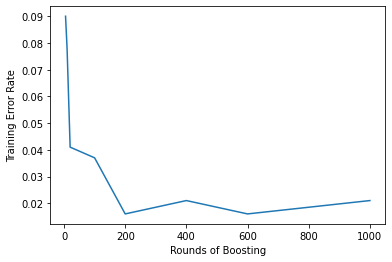

In [20]:
#Plotting graphs from the test data (1-Miner Accuracy) to number of iterations
iterations = [5,10,20,100,200,400,600,1000]
error_rate = [0.09,0.078,0.041,0.037,0.016,0.021,0.016,0.021]
plt.plot(iterations,error_rate)
plt.xlabel("Rounds of Boosting")
plt.ylabel("Training Error Rate")
plt.show()

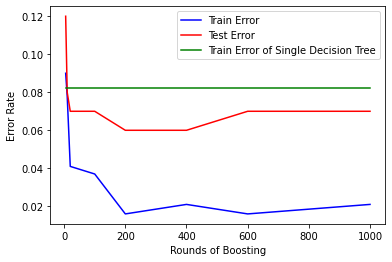

In [21]:
#Plotting graphs from the test data (1-Miner Accuracy) to number of iterations

iterations = [5,10,20,100,200,400,600,1000]
error_rate_train = [0.09,0.078,0.041,0.037,0.016,0.021,0.016,0.021]
lineSingleDescisionTree = [0.082, 0.082,0.082,0.082,0.082,0.082,0.082,0.082]
error_rate = [0.12,0.08,0.07,0.07,0.06,0.06,0.07,0.07]
plt.plot(iterations,error_rate_train, 'b', label='Train Error')
plt.plot(iterations,error_rate,'r', label='Test Error')
plt.plot(iterations,lineSingleDescisionTree,'g', label='Train Error of Single Decision Tree')
plt.xlabel("Rounds of Boosting")
plt.ylabel("Error Rate")
plt.legend()
plt.show()